<a href="https://colab.research.google.com/github/NYahirGranadosVargas/Proyectos-/blob/main/ProyectoM6_Procesamiento_de_Lenguaje_Natural_Yahir_Granados_Vargas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importamos la librerias que se van a usar.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#Para la Gráfica
import matplotlib.pyplot as plt
#Para la nube de palabras
from wordcloud import WordCloud
from nltk import FreqDist
#Para la vectorización
from sklearn.feature_extraction.text import CountVectorizer
#Para el entrenamiento 1
from sklearn.linear_model import LogisticRegression
#Para la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Ucamp/training.1600000.processed.noemoticon.csv',encoding="CP1252",header=None)

In [ ]:
df[df[0]==11990]

,0,1,2,3,4,5


In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

# Filtramos la informacion, quitamos los valores que no sirven para el modelo


In [ ]:
df = df.iloc[:,[5,0]]
df.columns = ['Text','Class']
df = df.sample(12000)
df.reset_index(drop=True,inplace=True)
df.tail(10)

,Text,Class
11990,www.myspace.com/clairclarke chet her out,4
11991,Chris is taking Rockband! I'm going to have...,0
11992,Ok im just sendin a warning....Im becoming sor...,4
11993,@Aheram looking forward to the day we can skyp...,4
11994,Omg got loads of stuff to do exams tomorrow,0
11995,not vibing law at the moment,0
11996,@spanglegluppet there are some WONDERFUL photo...,4
11997,10 random tweets...and this time I will number...,4
11998,Aaaah! Nice Golden Virginia roll up!,4
11999,Everyone around me is getting calls from their...,0


# Realizamos la limpieza de los datos.

In [ ]:
df.isnull().sum()

Text     0
Class    0
dtype: int64

In [ ]:
df = df.replace(r'^\s$', np.nan,regex=True)
df = df.dropna()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub("\W"," ",text)
    #Remove urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #Remove numbers
    text = re.sub('\w*\d\w*', '', text)
    #Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [ ]:
df["Text"]=df['Text'].apply(clean_text)

In [ ]:
df.head()

,Text,Class
0,bicycling against the wind wasn t that bad but...,4
1,i m pretty sure ill be downgrading from unti...,0
2,haha do you do you have coke zero there to...,4
3,retrorewind i own a copy of quot the fix quot,4
4,oohh lol too many holly s,4


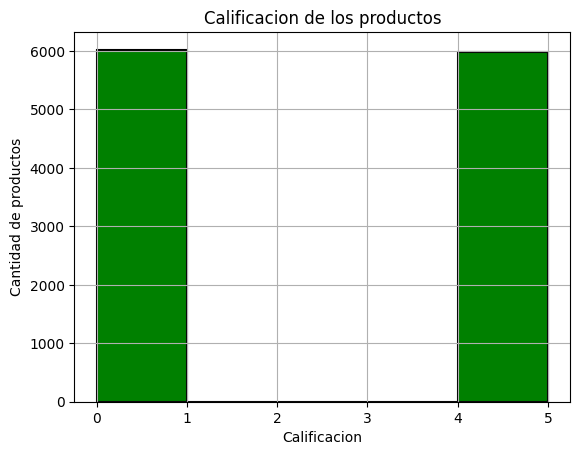

In [ ]:
# Creamos un histograma para visualizar las calificaciones de los productos
plt.hist(df['Class'], color="green",ec="black", lw=1.5, bins=[0,1,4,5])
plt.title("Calificacion de los productos")
plt.xlabel("Calificacion")
plt.ylabel("Cantidad de productos")
plt.grid(True)
plt.show()

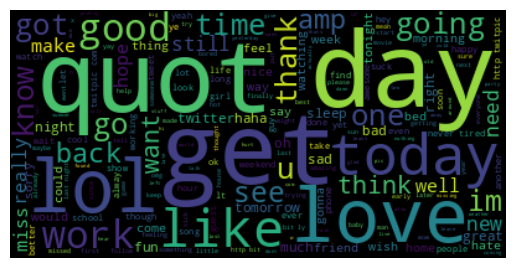

In [ ]:
#Cremos un lista de palabras en este caso en ingles
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
#Creamos una cadena de texto para poder visualizar los datos.
textt = " ".join(review for review in df.Text)

#Quitamos la palabras comunes y sin tanto peso
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

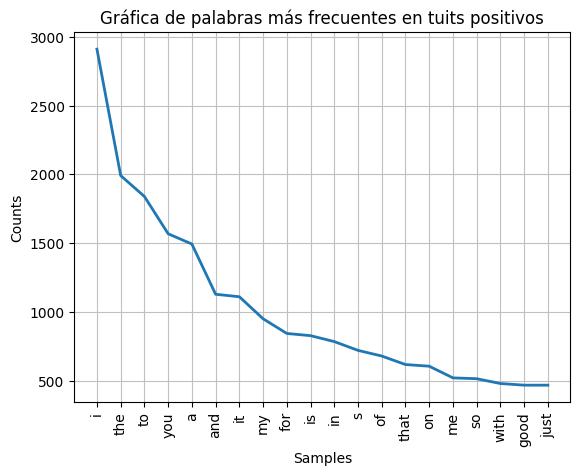

<Axes: title={'center': 'Gráfica de palabras más frecuentes en tuits positivos'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Generar una gráfica con tuits Positivos
df_positive = df[df['Class'] == 4]
plt.title('Gráfica de palabras más frecuentes en tuits positivos')
df_positive['Text'].str.split().apply(FreqDist).sum().plot(20, cumulative=False)

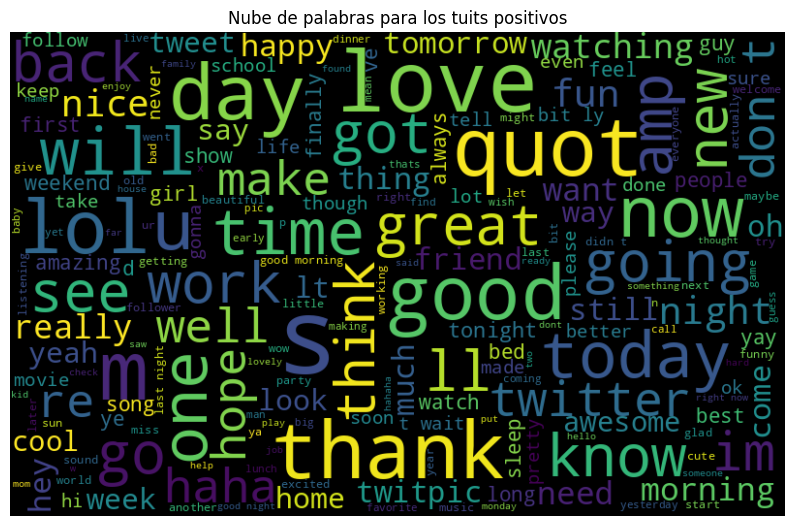

In [ ]:
#Visualizamos las palabras positivas
text_positive = df_positive['Text'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=500, max_font_size=110).generate(text_positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras para los tuits positivos')
plt.show()

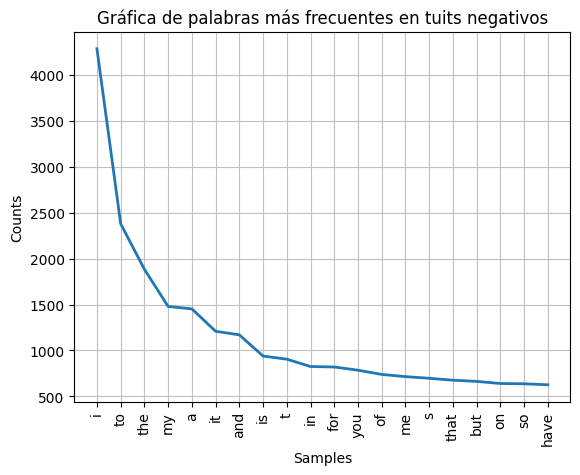

<Axes: title={'center': 'Gráfica de palabras más frecuentes en tuits negativos'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Hacemos lo mismo con los tuits negativos
df_negative = df[df['Class'] == 0]
plt.title('Gráfica de palabras más frecuentes en tuits negativos')
df_negative['Text'].str.split().apply(FreqDist).sum().plot(20, cumulative=False)

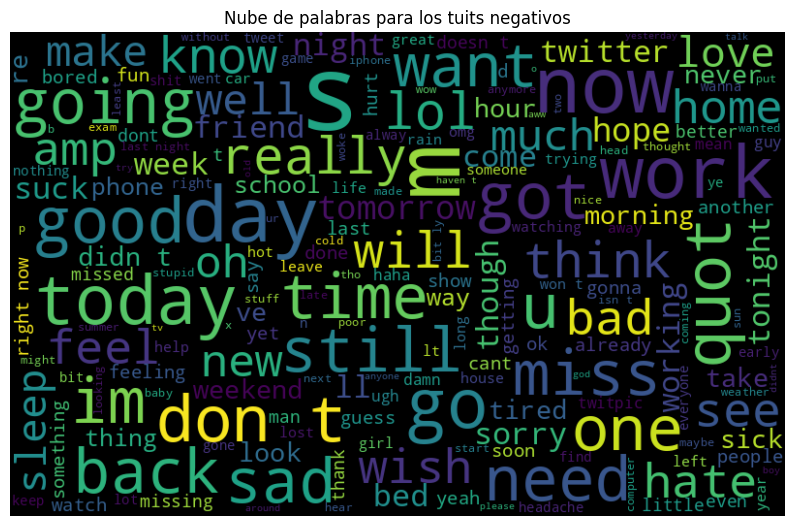

In [ ]:
#Visualizamos las palabras negativas
df_negative = df[df['Class'] == 0]
text_negative = df_negative['Text'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=500, max_font_size=110).generate(text_negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras para los tuits negativos')
plt.show()

#Convertimos una matriz de texto en una matriz de números para poder entrenar el modelo


In [ ]:
dfN = df[['Text','Class']]
dfN.head()

,Text,Class
0,bicycling against the wind wasn t that bad but...,4
1,i m pretty sure ill be downgrading from unti...,0
2,haha do you do you have coke zero there to...,4
3,retrorewind i own a copy of quot the fix quot,4
4,oohh lol too many holly s,4


In [ ]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Text'])
test_matrix = vectorizer.transform(test['Text'])

#Aplicamos una regrasion logistica a los datos que vamos a analizar

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Class']
y_test = test['Class']
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = lr.predict(X_test)
print(X_test)

  (0, 0)	1
  (0, 1247)	1
  (0, 2089)	1
  (0, 2204)	1
  (0, 5348)	1
  (0, 5491)	1
  (0, 6855)	3
  (0, 6953)	1
  (0, 7252)	1
  (0, 8849)	1
  (0, 8916)	1
  (0, 9487)	1
  (0, 9878)	1
  (0, 11502)	1
  (0, 13774)	1
  (0, 13936)	1
  (0, 14204)	1
  (0, 14661)	1
  (0, 14720)	1
  (0, 15551)	1
  (0, 16308)	1
  (1, 0)	1
  (1, 2925)	1
  (1, 5883)	1
  (1, 6069)	1
  :	:
  (2396, 542)	1
  (2396, 1247)	1
  (2396, 5058)	1
  (2396, 5318)	1
  (2396, 5792)	1
  (2396, 5873)	1
  (2396, 6732)	1
  (2396, 6855)	1
  (2396, 7227)	1
  (2396, 7252)	1
  (2396, 8578)	1
  (2396, 9678)	1
  (2396, 9878)	1
  (2396, 10374)	1
  (2396, 10514)	1
  (2396, 10530)	1
  (2396, 10635)	1
  (2396, 10903)	1
  (2396, 11027)	1
  (2396, 13306)	1
  (2396, 14784)	1
  (2396, 14850)	1
  (2396, 14927)	1
  (2396, 16695)	1
  (2396, 16710)	1


In [ ]:
new = np.asarray(y_test)
cf_matrix = confusion_matrix(predictions,y_test)
cf_matrix

array([[887, 301],
       [321, 888]])

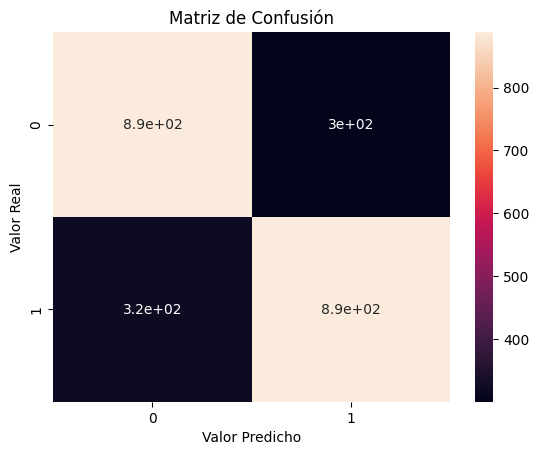

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1188
           4       0.75      0.73      0.74      1209

    accuracy                           0.74      2397
   macro avg       0.74      0.74      0.74      2397
weighted avg       0.74      0.74      0.74      2397



In [ ]:
r_test = "The best thing I could have bought in life"

In [ ]:
#Nuestro texto de test debe pasar por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([r_test])
prediction_test = lr.predict(review_convert)
prediction_test

array([4])

In [ ]:
r_test2 = "this is bad"

In [ ]:
review_convert = vectorizer.transform([r_test2])
prediction_test2 = lr.predict(review_convert)
prediction_test2

array([0])

In [ ]:
r_test3 = "this is bad"

In [ ]:
review_convert = vectorizer.transform([r_test3])
prediction_test3 = lr.predict(review_convert)
prediction_test3

array([0])

#Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y escribir las conclusiones de tus resultados.

Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

In [ ]:
"""#from sklearn.linear_model import TweedieRegressor
#from sklearn.naive_bayes.BernoulliNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

BerNB= BernoulliNB()
BerNB.fit(train_matrix, y_train)
y_pred=Tw.predict(test_matrix)

print('Test Accuracy: ', accuracy_score(y_test, y_pred)) """

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
#Iniciamos modelo
clf = BernoulliNB()
#Ajustamos los datos
clf.fit(train_matrix, y_train)
#Predicciones con los datos de prueba
y_pred = clf.predict(test_matrix)
#Precision del modelo
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.7338339591155612


In [ ]:
new = np.asarray(y_test)
cf_matrixB = confusion_matrix(y_pred,y_test)
cf_matrixB

array([[941, 371],
       [267, 818]])

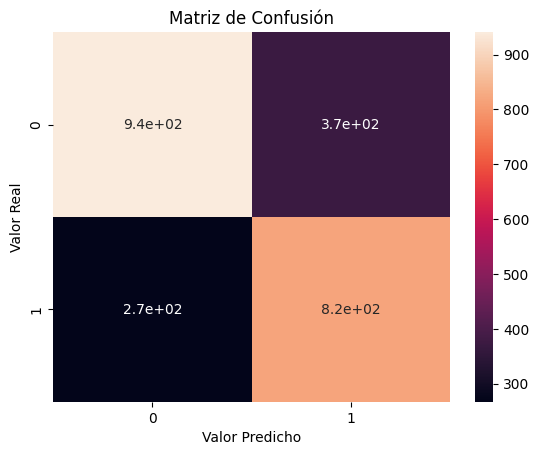

In [ ]:
sns.heatmap(cf_matrixB, annot=True)
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
#Desempeño del modelo
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1312
           4       0.69      0.75      0.72      1085

    accuracy                           0.73      2397
   macro avg       0.73      0.74      0.73      2397
weighted avg       0.74      0.73      0.73      2397



In [ ]:
review_test = "I loved"

In [ ]:
review_convert = vectorizer.transform([review_test])
prediction_test = clf.predict(review_convert)
prediction_test

array([4])

In [ ]:
review_test2 = "This is total bullshit "

In [ ]:
review_convert = vectorizer.transform([review_test2])
prediction_test2 = clf.predict(review_convert)
prediction_test2

array([4])

In [ ]:
review_test3 = "i hate this"

In [ ]:
review_convert = vectorizer.transform([review_test3])
prediction_test3 = clf.predict(review_convert)
prediction_test3

array([0])